# Taiwan Company Profile Bankruptcy Prediction
In this notebook we analyze information from the Taiwan Stock Exchange, including 95 features and 6819 rows representing the various listed companies.

Note that a common mistake is to oversample test data with SMOTE. Doing this gives a highly inflated F1 score because of the class imbalance in the dataset. Part of the difficulty in this set is to correctly classify the test data despite its significant class imbalance.

In [1]:
# First we'll import relevant packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

C:\Users\annie\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Loading the data
df = pd.read_csv('Bankruptcy_Detection/data.csv')

(6819, 96)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net In

None

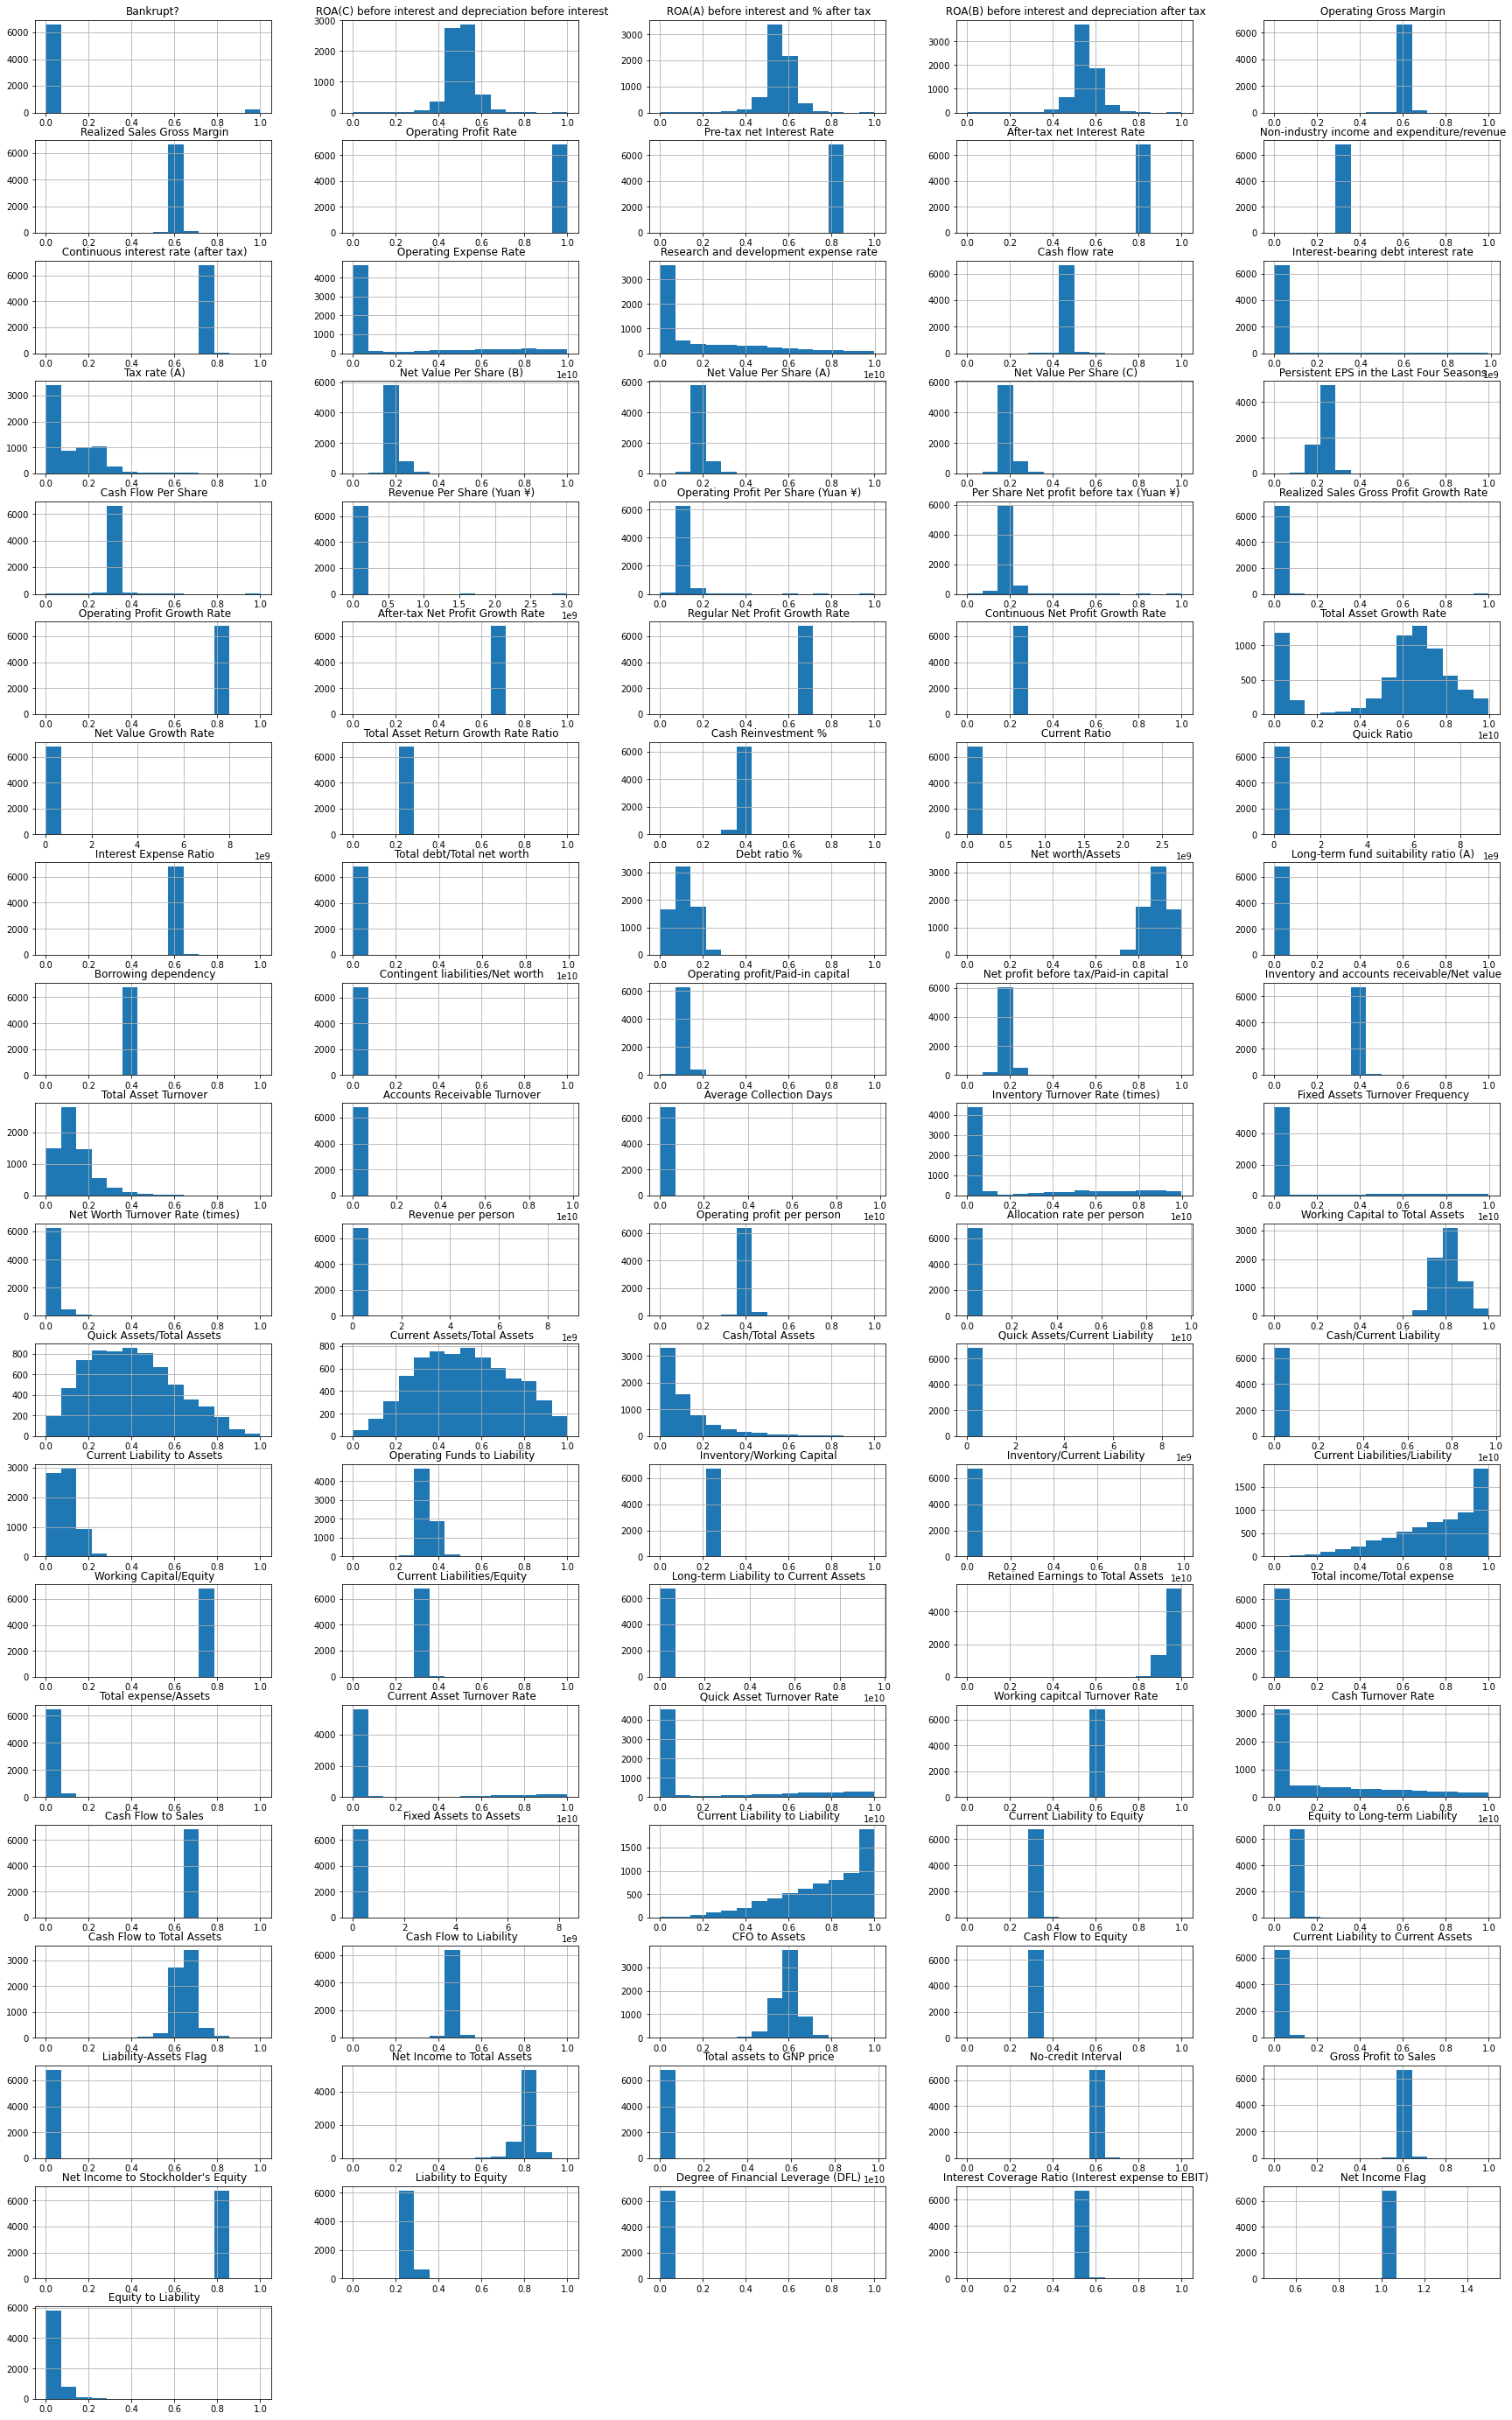

In [3]:
# EDA Block
df = df

display(df.shape)
print()
display(df.head(3))
print()
display(df.describe())
print()
display(df.info())
print()
df.hist(figsize=[30,50], bins=14, layout=[20, 5]);
print()
cor_plot = df.corr()
display(cor_plot.style.background_gradient(cmap = 'RdYlGn'))

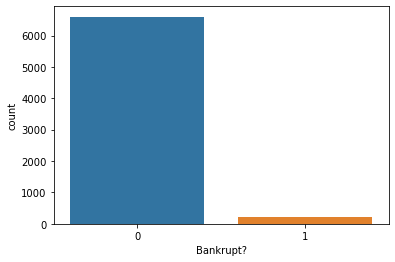

The class imbalance in the dataset is significant, with a target constituting only 3.2% of the data.


In [4]:
# Illustrating the Class Imbalance
plt.show(sns.countplot(x=df['Bankrupt?']))
class_imbalance = round(sum(df['Bankrupt?']) / len(df['Bankrupt?']), 3) * 100
print(f'The class imbalance in the dataset is significant, with a target constituting only {class_imbalance}% of the data.')

## Notes on EDA
The data seems well prepared and comes pre-normalized - all data is numeric and there are no missing values, so our data prep will be fairly minimal. The largest visible problem is that we have a significant class-imbalance problem which will need to be corrected with some oversampling strategy -- for this we will use SMOTE. It's important to apply SMOTE only to the training data, otherwise our test data will be compromised, giving us innacurate predictions. In future implementation, we can't apply SMOTE to our target because we should expect our prediction target in new data to be unlabeled.

The other thing we could do at this stage is process any significant outliers. Since the data has come to us normalized, I've opted to skip this step.

In [5]:
# Assigning X and Y
X = df.drop(labels='Bankrupt?', axis=1)
y = df['Bankrupt?']

In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Class Imbalance addresssed with SMOTE:


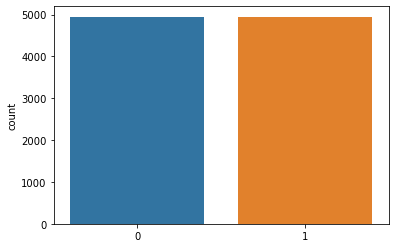

In [7]:
# Balancing class-imbalanced data with SMOTE
sm = SMOTE()
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train.ravel())
print('Class Imbalance addresssed with SMOTE:')
sns.countplot(x=y_train_SMOTE);

# Fitting Initial Models
Let's get some baseline models and compare their default outputs.

### Logistic Regression Baseline

In [8]:
log_reg=LogisticRegression()
log_reg.fit(X_train_SMOTE,y_train_SMOTE)

print('Training Accuracy: {:.4}%'.format(log_reg.score(X_train_SMOTE, y_train_SMOTE) * 100))
print('Validation accuracy: {:.4}%'.format(log_reg.score(X_test, y_test) * 100))

Training Accuracy: 61.48%
Validation accuracy: 77.77%


### XGBoost

In [9]:
# Instantiate and Fit an XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train_SMOTE, y_train_SMOTE)

# Accuracy of training and test sets
print('Training Accuracy: {:.4}%'.format(XGB.score(X_train_SMOTE, y_train_SMOTE) * 100))
print('Validation accuracy: {:.4}%'.format(XGB.score(X_test, y_test) * 100))

[14:28:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 100.0%
Validation accuracy: 96.95%


### Random Forest

In [10]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_SMOTE, y_train_SMOTE)

# Training and Testing accuracy score
print('Training Accuracy: {:.4}%'.format(forest.score(X_train_SMOTE, y_train_SMOTE) * 100))
print('Validation accuracy: {:.4}%'.format(forest.score(X_test, y_test) * 100))

Training Accuracy: 100.0%
Validation accuracy: 95.78%


# Model Validation

In [11]:
# Comparing all three models
print('LogReg Validation Accuracy: {:.4}%'.format(log_reg.score(X_test, y_test) * 100))
print('XGBoost Validation accuracy:    {:.4}%'.format(XGB.score(X_test, y_test) * 100))
print('Forest Validation accuracy: {:.4}%'.format(forest.score(X_test, y_test) * 100))

log_pred=log_reg.predict(X_test)
XGB_pred=XGB.predict(X_test)
RF_pred=forest.predict(X_test)

print('\nLogistic Regression Report:')
print(classification_report(y_test, log_pred))
print('\nXGBoost Report:')
print(classification_report(y_test, XGB_pred))
print('\nRF Report:')
print(classification_report(y_test, RF_pred))

LogReg Validation Accuracy: 77.77%
XGBoost Validation accuracy:    96.95%
Forest Validation accuracy: 95.78%

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1650
           1       0.05      0.31      0.08        55

    accuracy                           0.78      1705
   macro avg       0.51      0.55      0.48      1705
weighted avg       0.94      0.78      0.85      1705


XGBoost Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1650
           1       0.53      0.51      0.52        55

    accuracy                           0.97      1705
   macro avg       0.76      0.75      0.75      1705
weighted avg       0.97      0.97      0.97      1705


RF Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1650
           1       0.38      0.51      0.44        55

    accuracy   

Our baselines are showing superior performances for our XGBoost and Random Forest, but because of our class imbalance issue, accuracy is not a good measure of performance. Instead we should probably use F1 score and measure how many times the target is correctly classified.

In [12]:
print('Baseline Models with Default Parameters:\n')
print('Logistic Regression F1:')
print(f1_score(y_test, log_pred))
print('\nXGB F1:')
print(f1_score(y_test, XGB_pred))
print('\nRF F1:')
print(f1_score(y_test, RF_pred))

Baseline Models with Default Parameters:

Logistic Regression F1:
0.08232445520581114

XGB F1:
0.5185185185185185

RF F1:
0.43749999999999994


Looking at our F1 scores, there's probably some room for improvement. The next thing we will do is tune the hyperparameters of each model and look again at our F1 scores.

### Logistic Regression Hyperparameter Tuning

In [13]:
### Reference parameter grid for Logistic Regression
# log_reg_params = {"penalty": ['l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#                   'class_weight': ['balanced',None],
#                   'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [ ]:
logreg_params = {
    "C" : [0.01, 0.1, 1],
    'class_weight': ['balanced'],
    "penalty" : ["l1","l2"],
    'solver':['liblinear']
}

rand_logreg = RandomizedSearchCV(log_reg, logreg_params, scoring='f1', cv=3, n_jobs=1, n_iter=10, random_state=42)
rand_logreg.fit(X_train_SMOTE, y_train_SMOTE)

logreg_best_params = rand_logreg.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(logreg_best_params.keys()):
    print('%s: %r' % (param_name, logreg_best_params[param_name]))

In [ ]:
Rlogreg_pred=rand_logreg.predict(X_test)
print('Baseline Logistic Regression F1: ' + str(f1_score(y_test, log_pred)))
print('Tuned Logistic Regression F1: ' + str(f1_score(y_test, Rlogreg_pred)))

### XGBoost Hyperparameter Tuning

In [ ]:
### Some reference parameter grids
# {'eta'              : [0.1,0.01,0.001],  # Learning rate
#  'eval_metric'      : ['logloss'],
#  'max_depth'        : [3,6,9],
#  'lambda'           : [1,1.5,2],      # L2 regularization (higher values make model more conservative)
#  'alpha'            : [0,0.5,1]}        # L1 regularization (higher values make model more conservative)
#  #'reg'             : ['squarederror']}
#  #'random_state'    : [42]}

# {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [ ]:
# GridSearch for XGBoost

XGB_params = {
#     'learning_rate' : [0.15, 0.2, 0.3],
#     'min_child_weight' : [1, 3, 5, 7],
#     'gamma' : [0.0, 0.1, 0.2 , 0.3, 0.4],
#     'colsample_bytree' : [0.3, 0.4, 0.5 , 0.7],
    'alpha' : [0.01], # L1 regularization
#     'eta': [1, 0.1, 0.01,],
    'eval_metric':['mlogloss'],
    'lambda':[1], # L2 regularization
#     'booster' : ['gbtree', 'gblinear', 'dart'],
#     'max_depth': [5, 6, 7],
    'n_estimators': [120],
#     'scale_pos_weight' : [.9, 1, 1.1] # apparently deals with imbalanced data
#     'subsample': [0.5]
}

rand_XGB = RandomizedSearchCV(XGB, XGB_params, scoring='f1', cv=3, n_jobs=1, n_iter=10, random_state=42)
rand_XGB.fit(X_train_SMOTE, y_train_SMOTE)

XGB_best_parameters = rand_XGB.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(XGB_best_parameters.keys()):
    print('%s: %r' % (param_name, XGB_best_parameters[param_name]))

In [ ]:
RXGB_pred=rand_XGB.predict(X_test)
print('Baseline XGBoost F1: ' + str(f1_score(y_test, XGB_pred)))
print('Tuned XGB F1: ' + str(f1_score(y_test, RXGB_pred)))

### Random Forest Hyperparameter Tuning

In [ ]:
### Reference parameter grid
# rfc_params = {'max_features' : ['auto', 'sqrt', 'log2'],
#               'random_state' : [42],
#               'class_weight' : ['balanced','balanced_subsample'],
#               'criterion' : ['gini', 'entropy'],
#               'bootstrap' : [True,False]}

In [ ]:
# GridSearch for Random Forest
rf_params = {
    'bootstrap' : [False],
    'class_weight' : ['balanced'], # 'balanced_subsample',
    'criterion' : ['entropy'], # 'gini', 
    'max_features' : ['auto'],
    'max_depth' : [50, 60],
    'n_estimators' : [100, 120]
}

rand_rf = RandomizedSearchCV(forest, rf_params, scoring='f1', cv=2, n_jobs=1, n_iter=5, random_state=42)
rand_rf.fit(X_train_SMOTE, y_train_SMOTE)

rf_best_params = rand_rf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(rf_best_params.keys()):
    print('%s: %r' % (param_name, rf_best_params[param_name]))

In [ ]:
RRF_pred=rand_rf.predict(X_test)
print('Baseline Random Forest F1: ' + str(f1_score(y_test, RF_pred)))
print('Tuned Random Forest F1: ' + str(f1_score(y_test, RRF_pred)))

### Classification Reports

In [ ]:
print('\nTuned Logistic Regression Report:')
print(classification_report(y_test, Rlogreg_pred))
print('\nTuned XGBoost Report:')
print(classification_report(y_test, RXGB_pred))
print('\nTuned RF Report:')
print(classification_report(y_test, RRF_pred))

# Hyperparameter Tuning Results
How do our new scores relate to our initial scores?

In [ ]:
# Interpreting results of our hyperparameter tuning
print('Tuned F1 Compared to Baseline:\n')
print('Baseline Logistic Regression F1: ' + str(f1_score(y_test, log_pred)))
print('Tuned Logistic Regression F1: ' + str(f1_score(y_test, Rlogreg_pred)))
print()
print('Baseline XGBoost F1: ' + str(f1_score(y_test, XGB_pred)))
print('Tuned XGB F1: ' + str(f1_score(y_test, RXGB_pred)))
print()
print('Baseline Random Forest F1: ' + str(f1_score(y_test, RF_pred)))
print('Tuned Random Forest F1: ' + str(f1_score(y_test, RRF_pred)))

We were able to sqeeze some improvement out of each model, with the logistic regression in particular showing a considerable improvement. Navigating the class imbalance in the test data remains difficult. How did we affect the overall accuracy?

In [ ]:
# Accuracy Scores
print('Tuned Accuracy Scores compared to Baseline:\n')
print('LogReg Validation Accuracy:         {:.4}%'.format(log_reg.score(X_test, y_test) * 100))
print('Tuned LogReg Validation Accuracy:   {:.4}%'.format(rand_logreg.best_score_*100))
print()
print('XGBoost Validation Accuracy:        {:.4}%'.format(XGB.score(X_test, y_test) * 100))
print('Tuned XGBoost Validation Accuracy:  {:.4}%'.format(rand_XGB.best_score_*100))
print()
print('Forest Validation Accuracy:         {:.4}%'.format(forest.score(X_test, y_test) * 100))
print('Tuned Forest Validation Accuracy:   {:.4}%'.format(rand_rf.best_score_*100))

It looks like our model accuracy was not compromised, even though accuracy was not our scoring method in our hyperparameter tuning. Cool! Let's look at Precision and Recall with ROC curves and confusion matrices.

In [ ]:
# ROC Curves for Tuned Sets
logreg_fp, logreg_tp, thresholds=roc_curve(y_test, Rlogreg_pred, pos_label=1)
logreg_AUC=auc(logreg_fp, logreg_tp)*100
print(f'Logreg AUC: {round(logreg_AUC, 2)}% -- False Positives: {logreg_fp} -- True positives: {logreg_tp}')
plt.plot(logreg_fp, logreg_tp, color='blue',label = 'logreg_AUC = %0.2f' % logreg_AUC)

XGB_fp, XGB_tp, thresholds=roc_curve(y_test, RXGB_pred, pos_label=1)
XGB_AUC=auc(XGB_fp, XGB_tp)*100
print(f'XGB AUC:    {round(XGB_AUC, 2)}% -- False Positives: {XGB_fp} -- True positives: {XGB_tp}')
plt.plot(XGB_fp, XGB_tp, color='red',label = 'XGB_AUC = %0.2f' % XGB_AUC)

RF_fp, RF_tp, thresholds=roc_curve(y_test, RRF_pred, pos_label=1)
RF_AUC=auc(RF_fp, RF_tp)*100
print(f'RF AUC:     {round(RF_AUC, 2)}% -- False Positives: {RF_fp} -- True positives: {RF_tp}')
plt.plot(RF_fp, RF_tp, color='orange',label = 'RF_AUC = %0.2f' % RF_AUC)

plt.title('ROC Curves')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Tuned Classification Reports
print('\n---\n')
print('Tuned LogReg Confusion Matrix:')
plt.show(sns.heatmap(confusion_matrix(y_test, Rlogreg_pred), annot=True))
print('Tuned XGBoost Confusion Matrix:')
plt.show(sns.heatmap(confusion_matrix(y_test, RXGB_pred), annot=True))
print('Tuned Random Forest Confusion Matrix:')
plt.show(sns.heatmap(confusion_matrix(y_test, RRF_pred), annot=True))

# Final Model Selection
This is an interesting result - Even though Logistic Regression was the least accurate model we tested, it has the best Recall Score and Area Under the Curve. Depending on our goal, this may be the best option for us to flag potential companies earlier, with our XGboost or Random Forest models as more precise, less inclusive alternatives.

For that reason I recommend a simple two-model ensemble, where our logistic regression model is enough to raise flags and our XGboost model increases the confidence level of these flags.

# Misc Code

In [ ]:
ensemble = Rlogreg_pred + RXGB_pred

In [ ]:
assign = lambda x: 1 if x>=1 else 0
ensemble = list(map(assign, ensemble))

In [ ]:
plt.show(plt.hist(RXGB_pred))
plt.show(plt.hist(ensemble))

In [ ]:
plt.show(sns.heatmap(confusion_matrix(y_test, Rlogreg_pred), annot=True))
plt.show(sns.heatmap(confusion_matrix(y_test, ensemble), annot=True))

In [ ]:
print('\nTuned logreg Report:')
print(classification_report(y_test, Rlogreg_pred))
print('\nTuned ensemble Report:')
print(classification_report(y_test, ensemble))